In [1]:
def missing(df) : 
    missing_number = df.isnull().sum().sort_values(ascending = False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending = False)
    missing_values = pd.concat([missing_number, missing_percent], axis = 1, keys = ['Missing_number', 'Missing_percent'])
    return missing_values 

def categorize(df) :
    Quantitive_features = df.select_dtypes([np.number]).columns.tolist()
    Categorical_features = df.select_dtypes(exclude = [np.number]).columns.tolist()
    Discrete_features = [col for col in Quantitive_features if len(df[col].unique()) < 200]
    Continuous_features = [col for col in Quantitive_features if col not in Discrete_features]
    print("Quantitive feautres : {} \nDiscrete features : {} \nContinous features : {} \nCategorical features : {}\n"
     .format(Quantitive_features, Discrete_features, Continuous_features, Categorical_features))
    print("Number of quantitive feautres : {} \nNumber of discrete features : {} \nNumber of continous features : {} \nNumber of categorical features : {}"
     .format(len(Quantitive_features), len(Discrete_features), len(Continuous_features), len(Categorical_features)))
    return Quantitive_features, Categorical_features, Discrete_features, Continuous_features
    
def unique(df) : 
    tb1 = pd.DataFrame({'Columns' : df.columns, 'Number_of_Unique' : df.nunique().values.tolist(),
                       'Sample1' : df.sample(1).values.tolist()[0], 'Sample2' : df.sample(1).values.tolist()[0], 
                       'Sample3' : df.sample(1).values.tolist()[0],
                       'Sample4' : df.sample(1).values.tolist()[0], 'Sample5' : df.sample(1).values.tolist()[0]})
    return tb1
    
def data_glimpse(df) :  
      # Dataset preview 
    print("1. Dataset Preview \n")
    display(df.head())
    print("-------------------------------------------------------------------------------\n")
    
    # Columns imformation
    print("2. Column Imformation \n")
    print("Dataset have {} rows and {} columns".format(df.shape[0], df.shape[1]))
    print("\n") 
    print("Dataset Column name : {}".format(df.columns.values))
    print("\n")
    categorize(df)
    print("-------------------------------------------------------------------------------\n")
    
    # Basic imformation table 
    print("3. Missing data table : \n")
    display(missing(df))
    print("-------------------------------------------------------------------------------\n")
    
    print("4. Number of unique value by column : \n")
    display(unique(df))
    print("-------------------------------------------------------------------------------\n")
    
    print("5. Describe table : \n")
    display(df.describe())
    print("-------------------------------------------------------------------------------\n")
    
    print(df.info())
    print("-------------------------------------------------------------------------------\n")

In [2]:
# Data Analysis
import warnings 
warnings.filterwarnings('ignore')
    
import pandas as pd
import numpy as np
import os 
import missingno as msno
import matplotlib.pyplot as plt
    
# Data View
pd.options.display.max_columns = 200

# Import Basic Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
    


In [3]:
df_raw= pd.read_csv("C:\\Users\\jason\\OneDrive\\Desktop\\NCU\\8525_Multivariate Analysis\\Week 8\\Airport_Quarterly_Passenger_Survey.csv")

In [4]:
data_glimpse(df_raw)

1. Dataset Preview 



,Quarter,Date recorded,Departure time,Ground transportation to/from airport,Parking facilities,Parking facilities (value for money),Availability of baggage carts,Efficiency of check-in staff,Check-in wait time,Courtesy of of check-in staff,Wait time at passport inspection,Courtesy of inspection staff,Courtesy of security staff,Thoroughness of security inspection,Wait time of security inspection,Feeling of safety and security,Ease of finding your way through the airport,Flight information screens,Walking distance inside terminal,Ease of making connections,Courtesy of airport staff,Restaurants,Restaurants (value for money),Availability of banks/ATM/money changing,Shopping facilities,Shopping facilities (value for money),Internet access,Business/executive lounges,Availability of washrooms,Cleanliness of washrooms,Comfort of waiting/gate areas,Cleanliness of airport terminal,Ambience of airport,Arrivals passport and visa inspection,Speed of baggage delivery,Customs inspection,Overall satisfaction
0,4Q16,11/12/2016,8:46 PM,4.0,0.0,0.0,0.0,5.0,5.0,5.0,2.0,5.0,5.0,5.0,2.0,5.0,4.0,5.0,5.0,0.0,5.0,5.0,2.0,0.0,2.0,2.0,3.0,0.0,5.0,4.0,5.0,5.0,4.0,0.0,4.0,0.0,4.0
1,4Q16,10/5/2016,6:57 PM,5.0,0.0,0.0,0.0,5.0,4.0,5.0,0.0,0.0,4.0,5.0,5.0,5.0,4.0,5.0,5.0,0.0,0.0,4.0,4.0,0.0,3.0,3.0,5.0,0.0,5.0,5.0,4.0,5.0,4.0,0.0,5.0,0.0,4.0
2,4Q16,10/18/2016,10:55 AM,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.0,4.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,4.0,4.0,4.0,4.0,4.0,0.0,3.0,0.0,4.0
3,4Q16,10/20/2016,8:45 AM,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,4.0,NaN,5.0,4.0,0.0,0.0,0.0,5.0
4,4Q16,12/4/2016,10:30 AM,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,5.0,5.0,0.0,5.0,4.0,5.0,1.0,4.0,5.0,3.0,5.0,5.0,0.0,0.0,0.0,5.0


-------------------------------------------------------------------------------

2. Column Imformation 

Dataset have 3501 rows and 37 columns


Dataset Column name : ['Quarter' 'Date recorded' 'Departure time'
 'Ground transportation to/from airport' 'Parking facilities'
 'Parking facilities (value for money)' 'Availability of baggage carts'
 'Efficiency of check-in staff' 'Check-in wait time'
 'Courtesy of of check-in staff' 'Wait time at passport inspection'
 'Courtesy of inspection staff' 'Courtesy of security staff'
 'Thoroughness of security inspection' 'Wait time of security inspection'
 'Feeling of safety and security'
 'Ease of finding your way through the airport'
 'Flight information screens' 'Walking distance inside terminal'
 'Ease of making connections' 'Courtesy of airport staff' 'Restaurants'
 'Restaurants (value for money)'
 'Availability of banks/ATM/money changing' 'Shopping facilities'
 'Shopping facilities (value for money)' 'Internet access'
 'Business/executive l

,Missing_number,Missing_percent
Customs inspection,201,0.057412
Speed of baggage delivery,181,0.051700
Overall satisfaction,172,0.049129
Arrivals passport and visa inspection,143,0.040845
Courtesy of inspection staff,96,0.027421
Availability of baggage carts,91,0.025993
Business/executive lounges,91,0.025993
Ease of making connections,83,0.023708
Internet access,73,0.020851
Wait time at passport inspection,69,0.019709


-------------------------------------------------------------------------------

4. Number of unique value by column : 



,Columns,Number_of_Unique,Sample1,Sample2,Sample3,Sample4,Sample5
0,Quarter,10,1Q15,3Q15,2Q15,1Q15,1Q17
1,Date recorded,77,1/12/2015,7/6/2015,5/2/2015,2/6/2015,3/5/2017
2,Departure time,331,14:13,6:54,14:18,9:30,5:25 PM
3,Ground transportation to/from airport,6,0.0,5.0,5.0,3.0,4.0
4,Parking facilities,6,0.0,5.0,0.0,0.0,0.0
5,Parking facilities (value for money),6,0.0,5.0,0.0,0.0,0.0
6,Availability of baggage carts,6,4.0,0.0,0.0,0.0,0.0
7,Efficiency of check-in staff,6,5.0,0.0,5.0,5.0,3.0
8,Check-in wait time,6,5.0,0.0,5.0,5.0,3.0
9,Courtesy of of check-in staff,6,5.0,0.0,3.0,5.0,4.0


-------------------------------------------------------------------------------

5. Describe table : 



,Ground transportation to/from airport,Parking facilities,Parking facilities (value for money),Availability of baggage carts,Efficiency of check-in staff,Check-in wait time,Courtesy of of check-in staff,Wait time at passport inspection,Courtesy of inspection staff,Courtesy of security staff,Thoroughness of security inspection,Wait time of security inspection,Feeling of safety and security,Ease of finding your way through the airport,Flight information screens,Walking distance inside terminal,Ease of making connections,Courtesy of airport staff,Restaurants,Restaurants (value for money),Availability of banks/ATM/money changing,Shopping facilities,Shopping facilities (value for money),Internet access,Business/executive lounges,Availability of washrooms,Cleanliness of washrooms,Comfort of waiting/gate areas,Cleanliness of airport terminal,Ambience of airport,Arrivals passport and visa inspection,Speed of baggage delivery,Customs inspection,Overall satisfaction
count,3447.000000,3462.000000,3455.000000,3410.000000,3463.000000,3462.000000,3449.000000,3432.000000,3405.000000,3470.000000,3455.000000,3451.000000,3458.000000,3465.000000,3475.000000,3464.000000,3418.000000,3461.000000,3442.000000,3441.000000,3460.000000,3455.000000,3444.000000,3428.000000,3410.000000,3466.000000,3464.000000,3460.000000,3469.000000,3447.000000,3358.000000,3320.000000,3300.000000,3329.000000
mean,2.190601,1.129983,1.016787,1.036364,3.777649,3.789139,3.778197,3.347319,3.456388,3.961960,4.082200,4.019125,4.192308,4.506205,4.229353,4.397229,0.360152,3.590292,2.968623,2.547806,0.899133,1.885384,1.538037,1.901109,0.484164,3.908252,3.801386,4.002890,4.377054,4.232376,2.643538,0.918072,1.343030,1.825774
std,2.184189,1.857966,1.705863,1.796438,1.713169,1.725288,1.781195,1.963378,1.915271,1.423658,1.270877,1.291077,1.201329,0.867044,1.338527,0.911221,1.239017,1.862858,1.960568,1.816941,1.696705,2.010152,1.788888,1.955999,1.316863,1.430126,1.520611,1.024416,0.834454,0.882681,2.195285,1.734373,1.932766,2.212898
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,3.000000,2.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000,3.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,0.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,0.000000,4.000000,4.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,0.000000,0.000000,0.000000
75%,4.000000,3.000000,2.000000,2.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,0.000000,5.000000,5.000000,4.000000,0.000000,4.000000,3.000000,4.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,0.000000,3.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


-------------------------------------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3501 entries, 0 to 3500
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Quarter                                       3501 non-null   object 
 1   Date recorded                                 3501 non-null   object 
 2   Departure time                                3501 non-null   object 
 3   Ground transportation to/from airport         3447 non-null   float64
 4   Parking facilities                            3462 non-null   float64
 5   Parking facilities (value for money)          3455 non-null   float64
 6   Availability of baggage carts                 3410 non-null   float64
 7   Efficiency of check-in staff                  3463 non-null   float64
 8   Check-in wait time                            3462 non-nu

In [5]:
#Check Data Type
df_raw.dtypes

Quarter                                          object
Date recorded                                    object
Departure time                                   object
Ground transportation to/from airport           float64
Parking facilities                              float64
Parking facilities (value for money)            float64
Availability of baggage carts                   float64
Efficiency of check-in staff                    float64
Check-in wait time                              float64
Courtesy of of check-in staff                   float64
Wait time at passport inspection                float64
Courtesy of inspection staff                    float64
Courtesy of security staff                      float64
Thoroughness of security inspection             float64
Wait time of security inspection                float64
Feeling of safety and security                  float64
Ease of finding your way through the airport    float64
Flight information screens                      

In [6]:
df_raw.head() #preview first five rows

,Quarter,Date recorded,Departure time,Ground transportation to/from airport,Parking facilities,Parking facilities (value for money),Availability of baggage carts,Efficiency of check-in staff,Check-in wait time,Courtesy of of check-in staff,Wait time at passport inspection,Courtesy of inspection staff,Courtesy of security staff,Thoroughness of security inspection,Wait time of security inspection,Feeling of safety and security,Ease of finding your way through the airport,Flight information screens,Walking distance inside terminal,Ease of making connections,Courtesy of airport staff,Restaurants,Restaurants (value for money),Availability of banks/ATM/money changing,Shopping facilities,Shopping facilities (value for money),Internet access,Business/executive lounges,Availability of washrooms,Cleanliness of washrooms,Comfort of waiting/gate areas,Cleanliness of airport terminal,Ambience of airport,Arrivals passport and visa inspection,Speed of baggage delivery,Customs inspection,Overall satisfaction
0,4Q16,11/12/2016,8:46 PM,4.0,0.0,0.0,0.0,5.0,5.0,5.0,2.0,5.0,5.0,5.0,2.0,5.0,4.0,5.0,5.0,0.0,5.0,5.0,2.0,0.0,2.0,2.0,3.0,0.0,5.0,4.0,5.0,5.0,4.0,0.0,4.0,0.0,4.0
1,4Q16,10/5/2016,6:57 PM,5.0,0.0,0.0,0.0,5.0,4.0,5.0,0.0,0.0,4.0,5.0,5.0,5.0,4.0,5.0,5.0,0.0,0.0,4.0,4.0,0.0,3.0,3.0,5.0,0.0,5.0,5.0,4.0,5.0,4.0,0.0,5.0,0.0,4.0
2,4Q16,10/18/2016,10:55 AM,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.0,4.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,4.0,4.0,4.0,4.0,4.0,0.0,3.0,0.0,4.0
3,4Q16,10/20/2016,8:45 AM,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,4.0,NaN,5.0,4.0,0.0,0.0,0.0,5.0
4,4Q16,12/4/2016,10:30 AM,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,5.0,5.0,0.0,5.0,4.0,5.0,1.0,4.0,5.0,3.0,5.0,5.0,0.0,0.0,0.0,5.0


In [7]:
df_raw.describe() #get summary statistics about the dataset

,Ground transportation to/from airport,Parking facilities,Parking facilities (value for money),Availability of baggage carts,Efficiency of check-in staff,Check-in wait time,Courtesy of of check-in staff,Wait time at passport inspection,Courtesy of inspection staff,Courtesy of security staff,Thoroughness of security inspection,Wait time of security inspection,Feeling of safety and security,Ease of finding your way through the airport,Flight information screens,Walking distance inside terminal,Ease of making connections,Courtesy of airport staff,Restaurants,Restaurants (value for money),Availability of banks/ATM/money changing,Shopping facilities,Shopping facilities (value for money),Internet access,Business/executive lounges,Availability of washrooms,Cleanliness of washrooms,Comfort of waiting/gate areas,Cleanliness of airport terminal,Ambience of airport,Arrivals passport and visa inspection,Speed of baggage delivery,Customs inspection,Overall satisfaction
count,3447.000000,3462.000000,3455.000000,3410.000000,3463.000000,3462.000000,3449.000000,3432.000000,3405.000000,3470.000000,3455.000000,3451.000000,3458.000000,3465.000000,3475.000000,3464.000000,3418.000000,3461.000000,3442.000000,3441.000000,3460.000000,3455.000000,3444.000000,3428.000000,3410.000000,3466.000000,3464.000000,3460.000000,3469.000000,3447.000000,3358.000000,3320.000000,3300.000000,3329.000000
mean,2.190601,1.129983,1.016787,1.036364,3.777649,3.789139,3.778197,3.347319,3.456388,3.961960,4.082200,4.019125,4.192308,4.506205,4.229353,4.397229,0.360152,3.590292,2.968623,2.547806,0.899133,1.885384,1.538037,1.901109,0.484164,3.908252,3.801386,4.002890,4.377054,4.232376,2.643538,0.918072,1.343030,1.825774
std,2.184189,1.857966,1.705863,1.796438,1.713169,1.725288,1.781195,1.963378,1.915271,1.423658,1.270877,1.291077,1.201329,0.867044,1.338527,0.911221,1.239017,1.862858,1.960568,1.816941,1.696705,2.010152,1.788888,1.955999,1.316863,1.430126,1.520611,1.024416,0.834454,0.882681,2.195285,1.734373,1.932766,2.212898
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,3.000000,2.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000,3.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,0.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,0.000000,4.000000,4.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,0.000000,0.000000,0.000000
75%,4.000000,3.000000,2.000000,2.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,0.000000,5.000000,5.000000,4.000000,0.000000,4.000000,3.000000,4.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,0.000000,3.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [8]:
df_raw.info() #get additional detail from data i.e., count of non-null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3501 entries, 0 to 3500
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Quarter                                       3501 non-null   object 
 1   Date recorded                                 3501 non-null   object 
 2   Departure time                                3501 non-null   object 
 3   Ground transportation to/from airport         3447 non-null   float64
 4   Parking facilities                            3462 non-null   float64
 5   Parking facilities (value for money)          3455 non-null   float64
 6   Availability of baggage carts                 3410 non-null   float64
 7   Efficiency of check-in staff                  3463 non-null   float64
 8   Check-in wait time                            3462 non-null   float64
 9   Courtesy of of check-in staff                 3449 non-null   f

In [9]:
#Removing any row with NA's in the response variable

df_dropna = df_raw.dropna(subset=['Overall satisfaction'])
df_dropna.describe()

,Ground transportation to/from airport,Parking facilities,Parking facilities (value for money),Availability of baggage carts,Efficiency of check-in staff,Check-in wait time,Courtesy of of check-in staff,Wait time at passport inspection,Courtesy of inspection staff,Courtesy of security staff,Thoroughness of security inspection,Wait time of security inspection,Feeling of safety and security,Ease of finding your way through the airport,Flight information screens,Walking distance inside terminal,Ease of making connections,Courtesy of airport staff,Restaurants,Restaurants (value for money),Availability of banks/ATM/money changing,Shopping facilities,Shopping facilities (value for money),Internet access,Business/executive lounges,Availability of washrooms,Cleanliness of washrooms,Comfort of waiting/gate areas,Cleanliness of airport terminal,Ambience of airport,Arrivals passport and visa inspection,Speed of baggage delivery,Customs inspection,Overall satisfaction
count,3286.000000,3297.000000,3295.000000,3255.000000,3296.000000,3293.000000,3282.000000,3271.000000,3246.000000,3302.000000,3289.000000,3285.000000,3290.000000,3296.000000,3305.000000,3297.000000,3265.000000,3296.000000,3280.000000,3282.000000,3305.000000,3294.000000,3285.000000,3273.000000,3265.000000,3300.000000,3299.000000,3293.000000,3304.000000,3285.000000,3200.000000,3248.000000,3232.000000,3329.000000
mean,2.187766,1.119199,1.013657,1.010445,3.776396,3.787732,3.773004,3.348212,3.457486,3.963658,4.086044,4.021005,4.203647,4.518811,4.240847,4.408553,0.361103,3.590109,2.976220,2.553321,0.884115,1.868549,1.526636,1.905897,0.467994,3.911818,3.797514,4.004251,4.381053,4.237747,2.616563,0.906712,1.340656,1.825774
std,2.189024,1.855207,1.707726,1.780144,1.722493,1.731579,1.791977,1.969988,1.921545,1.431210,1.275190,1.298077,1.193062,0.848606,1.329071,0.902511,1.240313,1.869428,1.961364,1.817250,1.687138,2.006979,1.787843,1.954949,1.295130,1.429917,1.529847,1.024301,0.830696,0.879687,2.206198,1.725078,1.931986,2.212898
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,3.000000,2.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000,3.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,0.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,0.000000,4.000000,4.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,0.000000,0.000000,0.000000
75%,4.000000,3.000000,2.000000,2.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,0.000000,5.000000,5.000000,4.000000,0.000000,4.000000,3.000000,4.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,0.000000,3.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [10]:
# Impute median value to NAs
df_impute = df_dropna.fillna(df_dropna.median())
df_impute.describe()

,Ground transportation to/from airport,Parking facilities,Parking facilities (value for money),Availability of baggage carts,Efficiency of check-in staff,Check-in wait time,Courtesy of of check-in staff,Wait time at passport inspection,Courtesy of inspection staff,Courtesy of security staff,Thoroughness of security inspection,Wait time of security inspection,Feeling of safety and security,Ease of finding your way through the airport,Flight information screens,Walking distance inside terminal,Ease of making connections,Courtesy of airport staff,Restaurants,Restaurants (value for money),Availability of banks/ATM/money changing,Shopping facilities,Shopping facilities (value for money),Internet access,Business/executive lounges,Availability of washrooms,Cleanliness of washrooms,Comfort of waiting/gate areas,Cleanliness of airport terminal,Ambience of airport,Arrivals passport and visa inspection,Speed of baggage delivery,Customs inspection,Overall satisfaction
count,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.00000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000
mean,2.185341,1.108441,1.003304,0.987984,3.788525,3.800841,3.790327,3.359567,3.471012,3.963953,4.085011,4.020727,4.212977,4.523581,4.246320,4.414239,0.35416,3.594172,2.991289,2.559628,0.877741,1.848904,1.506458,1.890658,0.458997,3.912586,3.799339,4.004205,4.385701,4.234605,2.670171,0.884650,1.301592,1.825774
std,2.174940,1.849494,1.702035,1.766536,1.718214,1.726748,1.785159,1.954608,1.899318,1.425396,1.267538,1.289469,1.189144,0.845733,1.325827,0.900014,1.22933,1.860580,1.950772,1.805142,1.682707,2.005476,1.784525,1.941930,1.284225,1.423697,1.523056,1.018746,0.829294,0.874274,2.179439,1.709675,1.916935,2.212898
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,3.000000,2.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.00000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000,3.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,0.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,0.00000,4.000000,4.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,0.000000,0.000000,0.000000
75%,4.000000,3.000000,2.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,0.00000,5.000000,5.000000,4.000000,0.000000,4.000000,3.000000,4.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,0.000000,3.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [11]:
# Glimpse new data after imputation

data_glimpse(df_impute)

1. Dataset Preview 



,Quarter,Date recorded,Departure time,Ground transportation to/from airport,Parking facilities,Parking facilities (value for money),Availability of baggage carts,Efficiency of check-in staff,Check-in wait time,Courtesy of of check-in staff,Wait time at passport inspection,Courtesy of inspection staff,Courtesy of security staff,Thoroughness of security inspection,Wait time of security inspection,Feeling of safety and security,Ease of finding your way through the airport,Flight information screens,Walking distance inside terminal,Ease of making connections,Courtesy of airport staff,Restaurants,Restaurants (value for money),Availability of banks/ATM/money changing,Shopping facilities,Shopping facilities (value for money),Internet access,Business/executive lounges,Availability of washrooms,Cleanliness of washrooms,Comfort of waiting/gate areas,Cleanliness of airport terminal,Ambience of airport,Arrivals passport and visa inspection,Speed of baggage delivery,Customs inspection,Overall satisfaction
0,4Q16,11/12/2016,8:46 PM,4.0,0.0,0.0,0.0,5.0,5.0,5.0,2.0,5.0,5.0,5.0,2.0,5.0,4.0,5.0,5.0,0.0,5.0,5.0,2.0,0.0,2.0,2.0,3.0,0.0,5.0,4.0,5.0,5.0,4.0,0.0,4.0,0.0,4.0
1,4Q16,10/5/2016,6:57 PM,5.0,0.0,0.0,0.0,5.0,4.0,5.0,0.0,0.0,4.0,5.0,5.0,5.0,4.0,5.0,5.0,0.0,0.0,4.0,4.0,0.0,3.0,3.0,5.0,0.0,5.0,5.0,4.0,5.0,4.0,0.0,5.0,0.0,4.0
2,4Q16,10/18/2016,10:55 AM,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.0,4.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,4.0,4.0,4.0,4.0,4.0,0.0,3.0,0.0,4.0
3,4Q16,10/20/2016,8:45 AM,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,4.0,4.0,5.0,4.0,0.0,0.0,0.0,5.0
4,4Q16,12/4/2016,10:30 AM,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,5.0,5.0,0.0,5.0,4.0,5.0,1.0,4.0,5.0,3.0,5.0,5.0,0.0,0.0,0.0,5.0


-------------------------------------------------------------------------------

2. Column Imformation 

Dataset have 3329 rows and 37 columns


Dataset Column name : ['Quarter' 'Date recorded' 'Departure time'
 'Ground transportation to/from airport' 'Parking facilities'
 'Parking facilities (value for money)' 'Availability of baggage carts'
 'Efficiency of check-in staff' 'Check-in wait time'
 'Courtesy of of check-in staff' 'Wait time at passport inspection'
 'Courtesy of inspection staff' 'Courtesy of security staff'
 'Thoroughness of security inspection' 'Wait time of security inspection'
 'Feeling of safety and security'
 'Ease of finding your way through the airport'
 'Flight information screens' 'Walking distance inside terminal'
 'Ease of making connections' 'Courtesy of airport staff' 'Restaurants'
 'Restaurants (value for money)'
 'Availability of banks/ATM/money changing' 'Shopping facilities'
 'Shopping facilities (value for money)' 'Internet access'
 'Business/executive l

,Missing_number,Missing_percent
Quarter,0,0.0
Ease of making connections,0,0.0
Restaurants,0,0.0
Restaurants (value for money),0,0.0
Availability of banks/ATM/money changing,0,0.0
Shopping facilities,0,0.0
Shopping facilities (value for money),0,0.0
Internet access,0,0.0
Business/executive lounges,0,0.0
Availability of washrooms,0,0.0


-------------------------------------------------------------------------------

4. Number of unique value by column : 



,Columns,Number_of_Unique,Sample1,Sample2,Sample3,Sample4,Sample5
0,Quarter,10,3Q15,3Q15,1Q15,2Q16,1Q15
1,Date recorded,77,7/2/2015,7/3/2015,3/3/2015,5/1/2016,3/1/2015
2,Departure time,331,16:28,11:59,10:30,14:23,18:20
3,Ground transportation to/from airport,6,4.0,0.0,0.0,4.0,0.0
4,Parking facilities,6,4.0,0.0,0.0,0.0,0.0
5,Parking facilities (value for money),6,4.0,0.0,0.0,0.0,0.0
6,Availability of baggage carts,6,0.0,4.0,0.0,0.0,0.0
7,Efficiency of check-in staff,6,5.0,5.0,5.0,5.0,0.0
8,Check-in wait time,6,5.0,5.0,0.0,0.0,0.0
9,Courtesy of of check-in staff,6,5.0,4.0,5.0,0.0,0.0


-------------------------------------------------------------------------------

5. Describe table : 



,Ground transportation to/from airport,Parking facilities,Parking facilities (value for money),Availability of baggage carts,Efficiency of check-in staff,Check-in wait time,Courtesy of of check-in staff,Wait time at passport inspection,Courtesy of inspection staff,Courtesy of security staff,Thoroughness of security inspection,Wait time of security inspection,Feeling of safety and security,Ease of finding your way through the airport,Flight information screens,Walking distance inside terminal,Ease of making connections,Courtesy of airport staff,Restaurants,Restaurants (value for money),Availability of banks/ATM/money changing,Shopping facilities,Shopping facilities (value for money),Internet access,Business/executive lounges,Availability of washrooms,Cleanliness of washrooms,Comfort of waiting/gate areas,Cleanliness of airport terminal,Ambience of airport,Arrivals passport and visa inspection,Speed of baggage delivery,Customs inspection,Overall satisfaction
count,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.00000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000,3329.000000
mean,2.185341,1.108441,1.003304,0.987984,3.788525,3.800841,3.790327,3.359567,3.471012,3.963953,4.085011,4.020727,4.212977,4.523581,4.246320,4.414239,0.35416,3.594172,2.991289,2.559628,0.877741,1.848904,1.506458,1.890658,0.458997,3.912586,3.799339,4.004205,4.385701,4.234605,2.670171,0.884650,1.301592,1.825774
std,2.174940,1.849494,1.702035,1.766536,1.718214,1.726748,1.785159,1.954608,1.899318,1.425396,1.267538,1.289469,1.189144,0.845733,1.325827,0.900014,1.22933,1.860580,1.950772,1.805142,1.682707,2.005476,1.784525,1.941930,1.284225,1.423697,1.523056,1.018746,0.829294,0.874274,2.179439,1.709675,1.916935,2.212898
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,3.000000,2.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.00000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000,3.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,0.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,0.00000,4.000000,4.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,0.000000,0.000000,0.000000
75%,4.000000,3.000000,2.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,0.00000,5.000000,5.000000,4.000000,0.000000,4.000000,3.000000,4.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,0.000000,3.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


-------------------------------------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3329 entries, 0 to 3500
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Quarter                                       3329 non-null   object 
 1   Date recorded                                 3329 non-null   object 
 2   Departure time                                3329 non-null   object 
 3   Ground transportation to/from airport         3329 non-null   float64
 4   Parking facilities                            3329 non-null   float64
 5   Parking facilities (value for money)          3329 non-null   float64
 6   Availability of baggage carts                 3329 non-null   float64
 7   Efficiency of check-in staff                  3329 non-null   float64
 8   Check-in wait time                            3329 non-nu

In [12]:
# Check the average of values for the explanatary variables. Grouped by the response variable.
df_impute.groupby('Overall satisfaction').mean()

,Ground transportation to/from airport,Parking facilities,Parking facilities (value for money),Availability of baggage carts,Efficiency of check-in staff,Check-in wait time,Courtesy of of check-in staff,Wait time at passport inspection,Courtesy of inspection staff,Courtesy of security staff,Thoroughness of security inspection,Wait time of security inspection,Feeling of safety and security,Ease of finding your way through the airport,Flight information screens,Walking distance inside terminal,Ease of making connections,Courtesy of airport staff,Restaurants,Restaurants (value for money),Availability of banks/ATM/money changing,Shopping facilities,Shopping facilities (value for money),Internet access,Business/executive lounges,Availability of washrooms,Cleanliness of washrooms,Comfort of waiting/gate areas,Cleanliness of airport terminal,Ambience of airport,Arrivals passport and visa inspection,Speed of baggage delivery,Customs inspection
Overall satisfaction,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,2.212121,1.106831,0.986133,0.983564,3.723164,3.750385,3.757062,3.233179,3.378531,3.923986,4.055984,3.956857,4.179764,4.529533,4.237802,4.396507,0.207499,3.609142,2.979969,2.565999,0.897278,1.870570,1.533128,1.888033,0.465331,3.897791,3.767848,4.004109,4.375449,4.216230,4.322548,0.031844,2.152542
1.0,1.000000,0.000000,0.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,4.000000,4.000000,0.000000,1.000000,4.000000,4.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.000000,4.000000,0.000000
2.0,2.100000,0.700000,0.900000,1.400000,3.800000,3.600000,3.600000,3.800000,3.500000,3.100000,3.400000,3.000000,3.800000,3.300000,3.400000,3.000000,0.000000,3.500000,2.000000,1.900000,1.100000,1.200000,1.000000,1.700000,1.000000,2.400000,2.200000,2.400000,3.200000,2.700000,0.800000,1.800000,0.500000
3.0,2.038462,0.953846,0.915385,0.900000,3.161538,3.100000,3.015385,2.815385,3.030769,3.130769,3.338462,3.238462,3.515385,3.838462,3.669231,3.646154,0.500000,2.684615,2.523077,2.076923,0.807692,1.515385,1.246154,1.446154,0.676923,3.123077,3.061538,3.007692,3.469231,3.269231,0.515385,1.730769,0.146154
4.0,2.133829,1.083643,0.957249,0.773234,3.570632,3.598513,3.498141,3.427509,3.434944,3.734201,3.897770,3.897770,4.013011,4.355019,4.083643,4.267658,0.434944,3.208178,2.767658,2.338290,0.778810,1.613383,1.301115,1.775093,0.330855,3.669145,3.581784,3.687732,4.133829,3.899628,0.351301,1.840149,0.094796
5.0,2.180654,1.167852,1.105263,1.170697,4.253201,4.227596,4.251778,3.751067,3.834993,4.416785,4.456615,4.450925,4.593172,4.785206,4.513514,4.738265,0.677098,4.021337,3.293030,2.807966,0.906117,2.038407,1.642959,2.068279,0.487909,4.308677,4.213371,4.455192,4.795164,4.743954,0.297297,2.341394,0.095306


In [13]:
#Removing any row with 0's in the response variable

df_clean = df_impute[(df_impute[['Overall satisfaction']] != 0).all(axis=1)]
df_clean.describe()

,Ground transportation to/from airport,Parking facilities,Parking facilities (value for money),Availability of baggage carts,Efficiency of check-in staff,Check-in wait time,Courtesy of of check-in staff,Wait time at passport inspection,Courtesy of inspection staff,Courtesy of security staff,Thoroughness of security inspection,Wait time of security inspection,Feeling of safety and security,Ease of finding your way through the airport,Flight information screens,Walking distance inside terminal,Ease of making connections,Courtesy of airport staff,Restaurants,Restaurants (value for money),Availability of banks/ATM/money changing,Shopping facilities,Shopping facilities (value for money),Internet access,Business/executive lounges,Availability of washrooms,Cleanliness of washrooms,Comfort of waiting/gate areas,Cleanliness of airport terminal,Ambience of airport,Arrivals passport and visa inspection,Speed of baggage delivery,Customs inspection,Overall satisfaction
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.00000,1382.000000
mean,2.147612,1.110709,1.027496,0.994211,3.880608,3.871925,3.837192,3.537627,3.601302,4.020260,4.125904,4.110709,4.259768,4.515195,4.258321,4.439219,0.560781,3.573082,3.007236,2.550651,0.850217,1.818379,1.468886,1.894356,0.450072,3.933430,3.843705,4.004342,4.400145,4.260492,0.342258,2.086107,0.10275,4.397974
std,2.159781,1.855001,1.728275,1.791434,1.717841,1.722688,1.803201,1.899644,1.850557,1.421729,1.279282,1.289983,1.200936,0.872453,1.337040,0.884493,1.510378,1.901278,1.955687,1.838118,1.661420,2.018275,1.789454,1.975699,1.286046,1.439053,1.510341,1.022546,0.816077,0.822486,1.150233,2.090417,0.63986,0.692943
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000,3.000000,4.000000,4.000000,0.000000,0.000000,0.00000,4.000000
50%,2.000000,0.000000,0.000000,0.000000,5.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,0.000000,4.000000,4.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,4.000000,4.000000,5.000000,4.000000,0.000000,2.000000,0.00000,5.000000
75%,4.000000,3.000000,2.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,0.000000,5.000000,5.000000,4.000000,0.000000,4.000000,3.000000,4.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,0.000000,4.000000,0.00000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000


<AxesSubplot:>

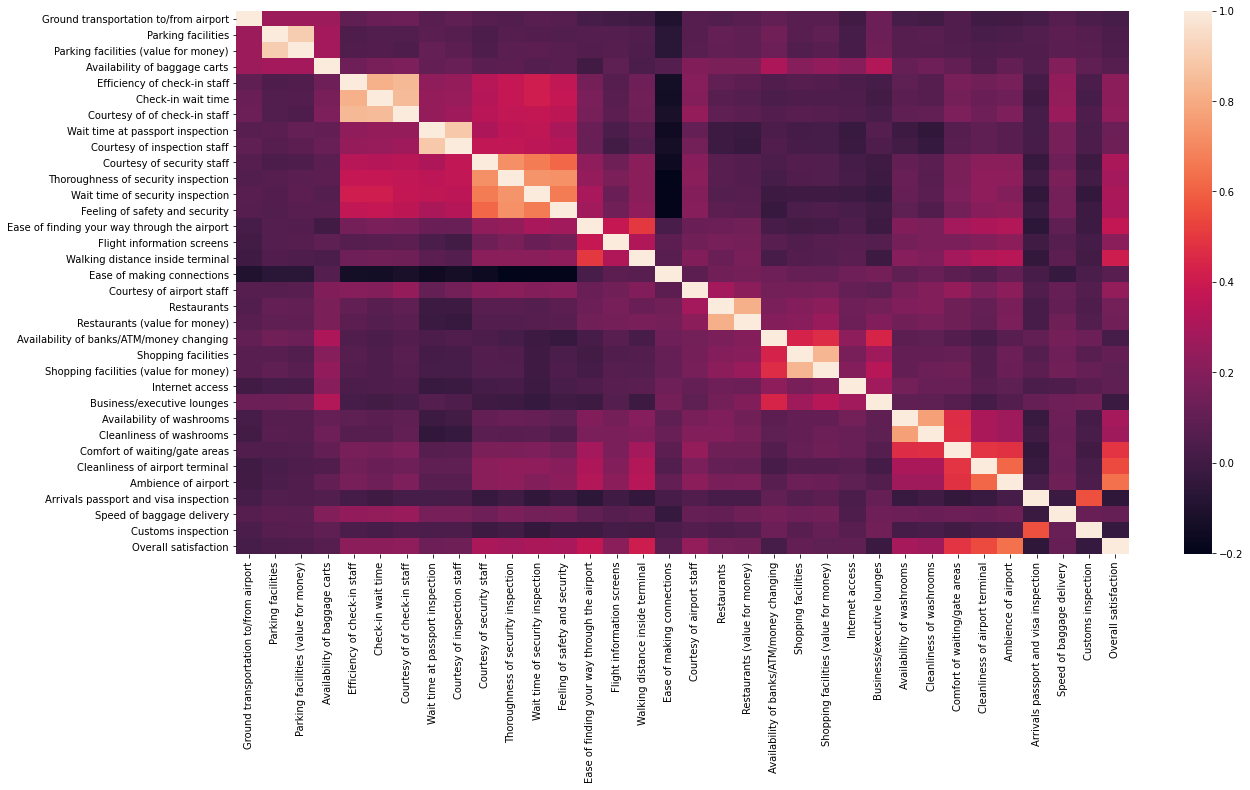

In [14]:
#Correlation matrix

plt.figure(figsize=(20,10))
c= df_clean.corr()
sns.heatmap(c)

In [15]:
# Create Correlation Matrix
corrmatrix = df_clean.corr()
print(corrmatrix)

                                              Ground transportation to/from airport  \
Ground transportation to/from airport                                      1.000000   
Parking facilities                                                         0.265400   
Parking facilities (value for money)                                       0.262741   
Availability of baggage carts                                              0.265416   
Efficiency of check-in staff                                               0.096288   
Check-in wait time                                                         0.124972   
Courtesy of of check-in staff                                              0.126473   
Wait time at passport inspection                                           0.074184   
Courtesy of inspection staff                                               0.095177   
Courtesy of security staff                                                 0.068828   
Thoroughness of security inspection        

<AxesSubplot:>

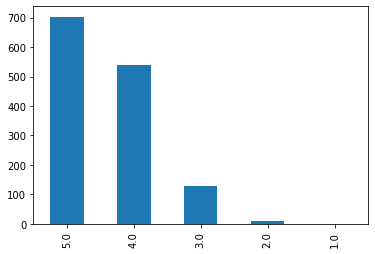

In [16]:
# Bar chart of frequency in the response variable
# series of counts
OScount = df_clean['Overall satisfaction'].value_counts()
# get bar chart
OScount.plot(kind='bar')


In [17]:
list(df_clean.columns[3:36].values.tolist())

['Ground transportation to/from airport',
 'Parking facilities',
 'Parking facilities (value for money)',
 'Availability of baggage carts',
 'Efficiency of check-in staff',
 'Check-in wait time',
 'Courtesy of of check-in staff',
 'Wait time at passport inspection',
 'Courtesy of inspection staff',
 'Courtesy of security staff',
 'Thoroughness of security inspection',
 'Wait time of security inspection',
 'Feeling of safety and security',
 'Ease of finding your way through the airport',
 'Flight information screens',
 'Walking distance inside terminal',
 'Ease of making connections',
 'Courtesy of airport staff',
 'Restaurants',
 'Restaurants (value for money)',
 'Availability of banks/ATM/money changing',
 'Shopping facilities',
 'Shopping facilities (value for money)',
 'Internet access',
 'Business/executive lounges',
 'Availability of washrooms',
 'Cleanliness of washrooms',
 'Comfort of waiting/gate areas',
 'Cleanliness of airport terminal',
 'Ambience of airport',
 'Arrivals pas

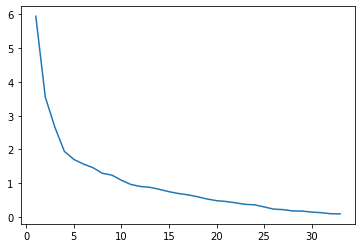

In [18]:
#Subset of the data
!pip install factor_analyzer  
from factor_analyzer import FactorAnalyzer

x =df_clean[df_clean.columns[3:36]]

fa = FactorAnalyzer()
fa.fit(x, 10)

#Get Eigen values and plot
ev, v = fa.get_eigenvalues()
ev
plt.plot(range(1,x.shape[1]+1),ev)

In [19]:
#Conduct Shapiro-Wilks normality test 
from scipy import stats

for i in df_clean.columns[3:36]:
    print([i])
    a,b = stats.shapiro(df_clean[[i]])
    print("Statistics", a, "p-value", b)
    if b < a:
        print("The null hypothesis can be rejected")
    else:
        print("the null hypothesis cannot be rejected")

['Ground transportation to/from airport']
Statistics 0.7575647234916687 p-value 5.382527531318055e-41
The null hypothesis can be rejected
['Parking facilities']
Statistics 0.6071565747261047 p-value 0.0
The null hypothesis can be rejected
['Parking facilities (value for money)']
Statistics 0.6186452507972717 p-value 0.0
The null hypothesis can be rejected
['Availability of baggage carts']
Statistics 0.5780311822891235 p-value 0.0
The null hypothesis can be rejected
['Efficiency of check-in staff']
Statistics 0.6559914350509644 p-value 0.0
The null hypothesis can be rejected
['Check-in wait time']
Statistics 0.6593786478042603 p-value 0.0
The null hypothesis can be rejected
['Courtesy of of check-in staff']
Statistics 0.647139310836792 p-value 0.0
The null hypothesis can be rejected
['Wait time at passport inspection']
Statistics 0.7124401926994324 p-value 1.555441295400547e-43
The null hypothesis can be rejected
['Courtesy of inspection staff']
Statistics 0.7065303921699524 p-value 7.7

In [20]:
!pip install scipy
from scipy.stats import studentized_range


In [21]:
!pip install pingouin
from pingouin import multivariate_normality

In [22]:
#Perform Mardia multivariate normality test
multivariate_normality(x,alpha =.05)

HZResults(hz=1.2066123201927592, pval=0.0, normal=False)

In [23]:
#Kaiser-Meyer-Olkin (KMO) Measure of Samnpling Adequacy (MSA)

from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(x)
print(kmo_model)



0.7831446927484224


In [24]:
#Bartlet's test of sphericity
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(x)
print(chi_square_value, p_value)

22635.99041748826 0.0


In [25]:
#get load from factors
fa = FactorAnalyzer(6, rotation='varimax', method='principal')
fa.fit(x)
loads = fa.loadings_
print(loads)

[[ 0.051815    0.08089735 -0.03959416  0.4835218   0.13600071 -0.0043242 ]
 [ 0.04274206  0.03760489  0.05711722  0.91797242 -0.03748964  0.02492663]
 [ 0.06685047  0.02314513  0.06528051  0.91872385 -0.04392541  0.01728402]
 [ 0.02866243  0.40953335  0.06821568  0.43455857  0.18109336 -0.02899069]
 [ 0.2500702   0.01436351  0.07609862  0.03102331  0.88113175  0.02747123]
 [ 0.2567955  -0.00593211  0.06721939  0.05504456  0.88411002  0.02438006]
 [ 0.23956402  0.03963533  0.091694    0.04654855  0.89814306  0.00275447]
 [ 0.69901181  0.07392972 -0.02711822  0.11158202  0.04408341 -0.25413919]
 [ 0.70793235  0.08151991 -0.0227247   0.09503189  0.06952074 -0.25942979]
 [ 0.73844245  0.01675945  0.17288196 -0.01862302  0.18727834  0.12407415]
 [ 0.78135566  0.00173306  0.18413628  0.00992296  0.21727364  0.11867295]
 [ 0.74636147 -0.0693016   0.18255362  0.02291935  0.25208497  0.14753918]
 [ 0.72686438 -0.02127893  0.16665532  0.00952272  0.22529964  0.16215083]
 [ 0.29664919 -0.04638953

In [26]:
#Get factor correlation

fa_corr = fa.corr_
print(fa_corr)

[[ 1.          0.26540025  0.26274097 ...  0.01958156  0.06598786
   0.03407895]
 [ 0.26540025  1.          0.90205894 ...  0.05451493  0.08493254
   0.06910795]
 [ 0.26274097  0.90205894  1.         ...  0.04990109  0.08292309
   0.07470977]
 ...
 [ 0.01958156  0.05451493  0.04990109 ...  1.         -0.01919209
   0.5592287 ]
 [ 0.06598786  0.08493254  0.08292309 ... -0.01919209  1.
   0.11951825]
 [ 0.03407895  0.06910795  0.07470977 ...  0.5592287   0.11951825
   1.        ]]


In [27]:
#Get rotation matrix

fa_rotation = fa.rotation_matrix_
print(fa_rotation)

[[ 0.61575482 -0.27370145  0.51548111 -0.18231791 -0.47948065  0.13065689]
 [ 0.51271835  0.7195013  -0.33933977  0.2003864  -0.22497069 -0.11627457]
 [-0.1593295   0.42327486  0.71182835  0.4483384   0.20645163  0.21242249]
 [-0.05659315 -0.39005367 -0.20229215  0.81711751 -0.36622135  0.04397878]
 [ 0.57293474 -0.27290094 -0.05707943  0.2267309   0.73604292 -0.02909839]
 [ 0.03351115  0.04033613 -0.26124312 -0.08068599  0.03141594  0.95995044]]


In [28]:
#Get factor communalities

fa_commu = fa.get_communalities()
print(fa_commu)

[0.26310509 0.85120356 0.85554792 0.39566889 0.84664269 0.85577239
 0.87620498 0.57379913 0.58949814 0.6262807  0.70581541 0.68102392
 0.63370211 0.4007857  0.24260389 0.37469734 0.24853978 0.24389199
 0.6307792  0.64729416 0.50019682 0.58158573 0.64508256 0.18162487
 0.40564161 0.54820034 0.57236134 0.57034464 0.52323365 0.49162405
 0.29297188 0.19015818 0.32763592]


In [29]:
#Get eigenvalues
fa_ev = fa.get_eigenvalues()
print(fa_ev)

(array([5.93959318, 3.54787907, 2.66333741, 1.94502933, 1.70685766,
       1.57085822, 1.46409826, 1.29576455, 1.24209735, 1.09033816,
       0.96489073, 0.90641134, 0.88014086, 0.82117245, 0.75214765,
       0.6981477 , 0.65887852, 0.60364844, 0.53591705, 0.48712147,
       0.46136201, 0.4239274 , 0.37807985, 0.3642029 , 0.30245379,
       0.23675507, 0.2214934 , 0.18283359, 0.17765603, 0.14975703,
       0.13176097, 0.10063618, 0.09475238]), array([ 5.56229592e+00,  3.11770650e+00,  2.21321922e+00,  1.70422342e+00,
        1.43280775e+00,  1.14112094e+00,  8.98415883e-01,  8.08844452e-01,
        7.46807813e-01,  5.21625359e-01,  4.18793217e-01,  2.32321780e-01,
        1.71993058e-01,  1.00048102e-01,  8.57847990e-02,  4.25016349e-02,
        2.80975906e-02,  1.90850783e-02,  9.77303618e-03, -3.64920532e-03,
       -1.51231958e-02, -3.78380991e-02, -5.16972861e-02, -6.68824408e-02,
       -7.59331878e-02, -9.84698002e-02, -1.26010172e-01, -1.56778020e-01,
       -1.95196166e-01, -2.

In [30]:
#Get uniqueness
fa_uniq = fa.get_uniquenesses()
print(fa_uniq)

[0.73689491 0.14879644 0.14445208 0.60433111 0.15335731 0.14422761
 0.12379502 0.42620087 0.41050186 0.3737193  0.29418459 0.31897608
 0.36629789 0.5992143  0.75739611 0.62530266 0.75146022 0.75610801
 0.3692208  0.35270584 0.49980318 0.41841427 0.35491744 0.81837513
 0.59435839 0.45179966 0.42763866 0.42965536 0.47676635 0.50837595
 0.70702812 0.80984182 0.67236408]


In [31]:
#Create Factors

factor1 = df_clean[['Wait time at passport inspection', 'Courtesy of inspection staff', 'Courtesy of security staff', 'Thoroughness of security inspection', 'Wait time of security inspection', 'Feeling of safety and security' ]]
factor2 = df_clean[['Ease of making connections', 'Courtesy of airport staff', 'Availability of banks/ATM/money changing', 'Shopping facilities', 'Shopping facilities (value for money)', 'Internet access' ]]
factor3 = df_clean[['Ease of finding your way through the airport', 'Flight information screens','Walking distance inside terminal' ]]
factor4 = df_clean[['Ground transportation to/from airport', 'Parking facilities', 'Parking facilities (value for money)', 'Availability of baggage carts']]
factor5 = df_clean[['Efficiency of check-in staff', 'Check-in wait time', 'Courtesy of of check-in staff']]
factor6 = df_clean[['Restaurants','Restaurants (value for money)']]

In [32]:
#Get cronback alpha

import pingouin as pg

f1_alpha = pg.cronbach_alpha(factor1)
f2_alpha = pg.cronbach_alpha(factor2)
f3_alpha = pg.cronbach_alpha(factor3)
f4_alpha = pg.cronbach_alpha(factor4)
f5_alpha = pg.cronbach_alpha(factor5)
f6_alpha = pg.cronbach_alpha(factor6)

print(f1_alpha, f2_alpha, f3_alpha, f4_alpha, f5_alpha, f6_alpha, )

(0.850317932722875, array([0.838, 0.862])) (0.6486647136581881, array([0.619, 0.677])) (0.6310747098976497, array([0.596, 0.664])) (0.6957970015208048, array([0.669, 0.721])) (0.9394868920278124, array([0.934, 0.945])) (0.8971837178979507, array([0.886, 0.907]))
